In [85]:
import pickle
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [26]:
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
df = pd.read_csv('./combined_words.csv')
df.columns = ['id','value','label']

In [13]:
df.drop('id', axis=1, inplace=True)

In [14]:
label_dict = {
    1: "ON",
    2: "OFF",
    3: "RIGHT",
    4: "LEFT"
}

In [15]:
df.head(7)

,value,label
0,9.52,1
1,60.40,1
2,167.00,1
3,265.00,1
4,283.00,1
5,253.00,1
6,260.00,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24576 entries, 0 to 24575
Data columns (total 2 columns):
value    24576 non-null float64
label    24576 non-null int64
dtypes: float64(1), int64(1)
memory usage: 384.1 KB


Text(0.5, 1.0, 'Class Frequency')

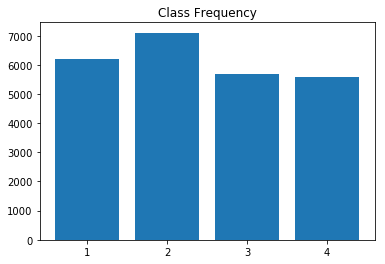

In [17]:
plt.bar(np.array(range(1, df.label.nunique()+1)) , df.groupby('label').count().values.reshape(-1))
plt.xticks(np.array(range(1, df.label.nunique()+1)), np.array(range(1, df.label.nunique()+1)))
plt.title('Class Frequency')

In [18]:
df.label.unique()

array([1, 2, 3, 4], dtype=int64)

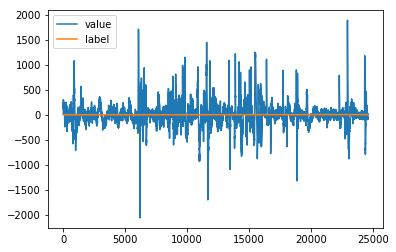

In [19]:
df.plot()

In [20]:
df.columns

Index(['value', 'label'], dtype='object')

In [21]:
X = df.value.values.reshape(-1,1)

In [22]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

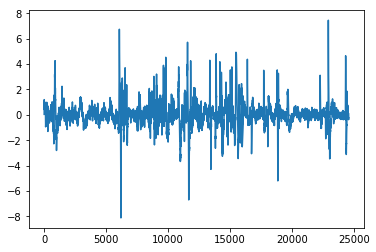

In [23]:
plt.plot(X_scaled)

In [24]:
y = df.label.values

In [28]:
models = [
    ('log_r', LogisticRegressionCV()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier()),
    ('lda', LinearDiscriminantAnalysis())
]

In [29]:
# setting random state
seed = 101

In [87]:
def get_model_score(X, y, estimator, name, scoring='accuracy'):
    print('*'*15, name, '*'*15)

    print('Init folds...')
    # fold
    kfold = KFold(10, True, random_state=seed)
    
    print('Training...')
    model_score = cross_val_score(estimator, X, y,
                    cv=kfold,
                    verbose=1,
                    scoring=scoring)
    
    print('Evaluation:')
    
    result = 'MEAN: %.3f \nSTD: (%.3f)' %(model_score.mean(), model_score.std())
    print(result)
    print( '\n')
    
    
    return model_score.mean()

In [92]:
class Base_Score(object):
    
    def __init__(self):
        from sklearn.linear_model import LinearRegression, LogisticRegressionCV
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.naive_bayes import GaussianNB
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
        from sklearn.preprocessing import StandardScaler
        self.models = [
                        ('log_r', LogisticRegressionCV()),
                        ('dt', DecisionTreeClassifier()),
                        ('rf', RandomForestClassifier()),
                        ('nb', GaussianNB()),
                        ('knn', KNeighborsClassifier()),
                        ('lda', LinearDiscriminantAnalysis())
                    ]
    def get_model_score(self, X, y, estimator, name, scoring='accuracy'):
        print('*'*15, name, '*'*15)

        print('Init folds...')
        # fold
        kfold = KFold(10, True, random_state=seed)

        print('Training...')
        model_score = cross_val_score(estimator, X, y,
                        cv=kfold,
                        verbose=1,
                        scoring=scoring)

        print('Evaluation:')

        result = 'MEAN: %.3f \nSTD: (%.3f)' %(model_score.mean(), model_score.std())
        print(result)
        print( '\n')


        return model_score.mean()

    def plot_base_model_score(self, X, y):
        scores = []
        names = []
        for name, model in models:
            scores.append(get_model_score(X, y, model, name))
            names.append(name)


        plt.figure(figsize=(10, 6))
        plt.bar(np.array(range(len(scores))), scores)
        plt.xticks(np.array(range(len(scores))), names)
        plt.show()

        return scores

In [93]:
bs = Base_Score()

In [ ]:
bs

*************** log_r ***************
Init folds...
Training...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Evaluation:
MEAN: 0.289 
STD: (0.007)


*************** dt ***************
Init folds...
Training...


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Evaluation:
MEAN: 0.297 
STD: (0.010)


*************** rf ***************
Init folds...
Training...


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Evaluation:
MEAN: 0.298 
STD: (0.009)


*************** nb ***************
Init folds...
Training...
Evaluation:
MEAN: 0.333 
STD: (0.011)


*************** knn ***************
Init folds...
Training...
Evaluation:
MEAN: 0.301 
STD: (0.010)


*************** lda ***************
Init folds...
Training...
Evaluation:
MEAN: 0.289 
STD: (0.007)




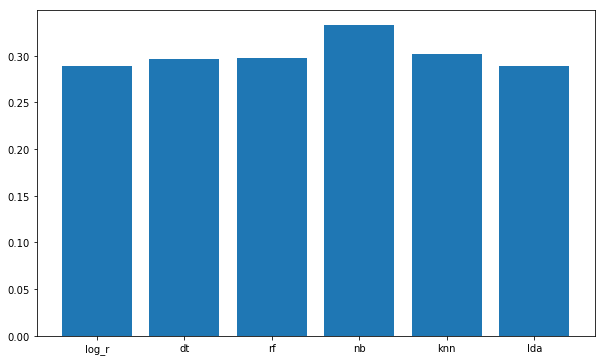

[0.2891432889805551,
 0.29658848218652933,
 0.2977280336515487,
 0.3325204253601325,
 0.30135048629759775,
 0.28910258893985497]

In [89]:
plot_base_model_score(X, y)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 )

In [172]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [175]:
pred = gnb.predict(X_test)

In [177]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[   0 1535   67  253]
 [   0 1681  137  221]
 [   0 1364  215  131]
 [   0 1326   60  383]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00      1855
          2       0.28      0.82      0.42      2039
          3       0.45      0.13      0.20      1710
          4       0.39      0.22      0.28      1769

avg / total       0.28      0.31      0.23      7373



/home/vedula/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [202]:
gnb_final = GaussianNB()
gnb_final.fit(X, y)

GaussianNB(priors=None)

In [208]:
print(classification_report(y_test, gnb_final.predict(X_test)))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00      1855
          2       0.32      0.50      0.39      2039
          3       0.43      0.14      0.21      1710
          4       0.34      0.70      0.46      1769

avg / total       0.27      0.34      0.27      7373



/home/vedula/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [209]:
pickle_file_name = 'nb_01.pkl'
pickle_file = open(pickle_file_name, mode='wb')
pickle.dump(gnb_final, pickle_file)
pickle_file.close()

In [210]:
# Loading the saved model pickle
model_pkl = open(pickle_file_name, 'rb')
saved_model = pickle.load(model_pkl)
print("Loaded NB model :: ", saved_model)

Loaded NB model ::  GaussianNB(priors=None)


In [211]:
print(classification_report(y_test, saved_model.predict(X_test)))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00      1855
          2       0.32      0.50      0.39      2039
          3       0.43      0.14      0.21      1710
          4       0.34      0.70      0.46      1769

avg / total       0.27      0.34      0.27      7373



/home/vedula/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
